<a href="https://colab.research.google.com/github/andref03/Previsao-de-Diabetes/blob/main/base_de_dados_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classificação: Validação e Métricas**

## **Criando um modelo inicial**

Usarei dois modelos (para fins comparativos): árvore de decisão ou TreeClassifier; RandomForest.


---


* Obs.: Esta database já está com os valores normalizados, com os dados tratados.


In [661]:
import pandas as pd

In [662]:
dados = pd.read_csv('/content/diabetes.csv') # caminho para o arquivo

In [663]:
dados # visualização

,glicemia,pressao_sanguinea,dobra_cutane_triceps,insulina,imc,diabetes
0,66,23,94,28.1,0.167,0
1,40,35,168,43.1,2.288,1
2,50,32,88,31.0,0.248,1
3,70,45,543,30.5,0.158,1
4,60,23,846,30.1,0.398,1
...,...,...,...,...,...,...
389,88,44,510,43.3,0.222,1
390,88,39,110,36.5,1.057,1
391,58,26,16,28.4,0.766,0
392,76,48,180,32.9,0.171,0


In [664]:
dados.info() # visualização

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394 entries, 0 to 393
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   glicemia              394 non-null    int64  
 1   pressao_sanguinea     394 non-null    int64  
 2   dobra_cutane_triceps  394 non-null    int64  
 3   insulina              394 non-null    float64
 4   imc                   394 non-null    float64
 5   diabetes              394 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 18.6 KB


### Separação de Variáveis

In [665]:
x = dados.drop('diabetes', axis = 1)
y = dados['diabetes']

In [666]:
x # visualização

,glicemia,pressao_sanguinea,dobra_cutane_triceps,insulina,imc
0,66,23,94,28.1,0.167
1,40,35,168,43.1,2.288
2,50,32,88,31.0,0.248
3,70,45,543,30.5,0.158
4,60,23,846,30.1,0.398
...,...,...,...,...,...
389,88,44,510,43.3,0.222
390,88,39,110,36.5,1.057
391,58,26,16,28.4,0.766
392,76,48,180,32.9,0.171


In [667]:
y # visualização

0      0
1      1
2      1
3      1
4      1
      ..
389    1
390    1
391    0
392    0
393    0
Name: diabetes, Length: 394, dtype: int64

## **Validação do Modelo**

A validação do modelo aqui é divida em 3 dados separados: *de treino, de
validação* e *de teste*. Este é o chamado **"Método Holdout"**, que pode ser representado na imagem abaixo:

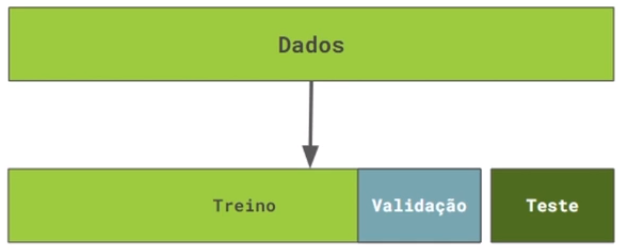

In [668]:
from sklearn.model_selection import train_test_split

In [669]:
# separa dados em 85% p/ "Treino" e 15% p/ "Teste"
x, x_teste, y, y_teste = train_test_split(x, y, stratify = y)
# separa 25% dos dados (dentre os dados de "Treino") para "Validação"
x_treino, x_val, y_treino, y_val = train_test_split(x, y, stratify = y)

In [670]:
from sklearn.tree import DecisionTreeClassifier

In [671]:
# modelo com profundida máxima de 3 "níveis de árvore"
modeloTree = DecisionTreeClassifier(max_depth = 3)
# faz o ajuste do modelo com os dados de treino
modeloTree.fit(x_treino, y_treino)
# usa os dados de validação p/ avaliar o ajuste feito
print(f'Acurácia de validação (TreeClassifier): {modeloTree.score(x_val, y_val)}')

Acurácia de validação (TreeClassifier): 0.7162162162162162


In [672]:
from sklearn.ensemble import RandomForestClassifier

In [673]:
# modelo com profundida máxima de 2 "níveis de árvore"
modeloForest = RandomForestClassifier(max_depth = 2)
# faz o ajuste do modelo com os dados de treino
modeloForest.fit(x_treino, y_treino)
# usa os dados de validação p/ avaliar o ajuste feito
print(f'Acurácia de validação (RandomForest): {modeloForest.score(x_val, y_val)}')

Acurácia de validação (RandomForest): 0.7837837837837838


## **Avaliando o modelo com a Matriz de Confusão**

In [674]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [675]:
# armazena as previsões
y_previstoTree = modeloTree.predict(x_val)
y_previstoForest = modeloForest.predict(x_val)

In [676]:
matriz_confusaoTree = confusion_matrix(y_val, y_previstoTree)
matriz_confusaoForest = confusion_matrix(y_val, y_previstoForest)

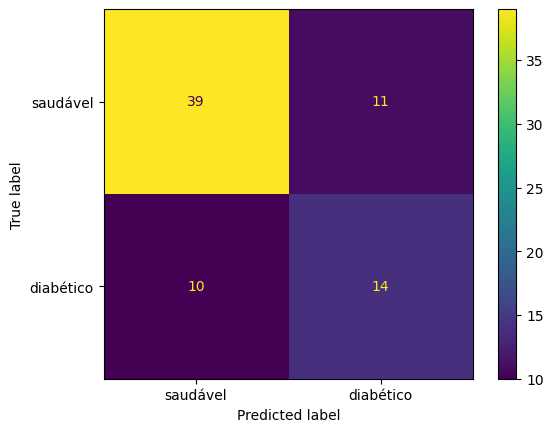

In [677]:
# melhorando a visualização da matriz de confusão com ConfusionMatrixDisplay
visualizaMatrizTree = ConfusionMatrixDisplay(confusion_matrix = matriz_confusaoTree, display_labels = ['saudável', 'diabético']) # display_labels = [0, 1]
visualizaMatrizTree.plot();
# ponto-e-vírgula para não mostrar as informações textuais que aparecem acima da visualização de dados

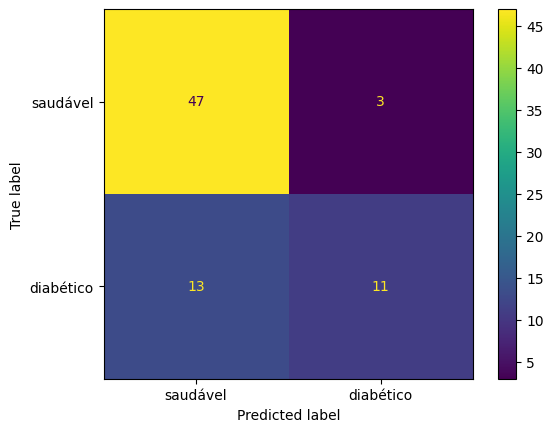

In [678]:
# melhorando a visualização da matriz de confusão com ConfusionMatrixDisplay
visualizaMatrizForest = ConfusionMatrixDisplay(confusion_matrix = matriz_confusaoForest, display_labels = ['saudável', 'diabético']) # display_labels = [0, 1]
visualizaMatrizForest.plot();
# ponto-e-vírgula para não mostrar as informações textuais que aparecem acima da visualização de dados

### Analisando a métrica mais importante

---

O objetivo deste banco de dados é a previsão de pacientes que possuem diabetes, de acordo com outras características.

Em que situação essa previsão poderia ser um **problema**?

* **A resposta é simples:** caso os pacientes que *realmente* possuem diabetes ('diabético' em True Label) sejam classificados como *saudáveis* ('saudável' em Predicted Label), temos um problema sério.

---

Isso significa que existiriam muitos *Falsos Negativos (FN)*. E a métrica que possui o FN em sua composição é justamente a métrica de **Recall**. Portanto, o **Recall** é a métrica mais importante para esta database, de forma que ela precise estar o mais próximo possível de 100% (ou 1.0) para que o *problema* citado seja minimizado.


## **Métricas de avaliação: Acurácia, Precisão, Recall e F1-Score**

In [679]:
from sklearn.metrics import accuracy_score

In [680]:
# compara os valores reais (de validação) com os valores previstos
print(f'Acurácia de validação (TreeClassifier): {accuracy_score(y_val, y_previstoTree)}')
print(f'Acurácia de validação (RandomForest):   {accuracy_score(y_val, y_previstoForest)}')

Acurácia de validação (TreeClassifier): 0.7162162162162162
Acurácia de validação (RandomForest):   0.7837837837837838


In [681]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [682]:
# Verificando as métricas de avaliação p/ a Árvore de Decisão
print(f'Precisão (TreeClassifier): {precision_score(y_val, y_previstoTree)}')
print(f'Recall   (TreeClassifier): {recall_score(y_val, y_previstoTree)}')
print(f'F1-Score (TreeClassifier): {f1_score(y_val, y_previstoTree)}')

Precisão (TreeClassifier): 0.56
Recall   (TreeClassifier): 0.5833333333333334
F1-Score (TreeClassifier): 0.5714285714285714


In [683]:
# Verificando as métricas de avaliação p/ a RandomForest
print(f'Precisão (RandomForest): {precision_score(y_val, y_previstoForest)}')
print(f'Recall   (RandomForest): {recall_score(y_val, y_previstoForest)}')
print(f'F1-Score (RandomForest): {f1_score(y_val, y_previstoForest)}')

Precisão (RandomForest): 0.7857142857142857
Recall   (RandomForest): 0.4583333333333333
F1-Score (RandomForest): 0.5789473684210527


### Analisando a métrica mais importante

---

O **Recall**, que foi considerada acima como a métrica mais importante nessa database, está longe do 100%. Então devemos aproximar o Recall do 100%.

## **Curva ROC**

Quanto mais próxima a curva estiver no **0.0 das abscissas** e **1.0 das ordenadas**, significa que melhor é nosso modelo. Caso contrário, se a curva se aproximar de uma diagonal, significa que pior é o nosso modelo.

---

* **Obs.:** a AUC (Area Under Curve) deve se aproximar de **1.0**, quanto melhor ser o nosso modelo.

In [684]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score

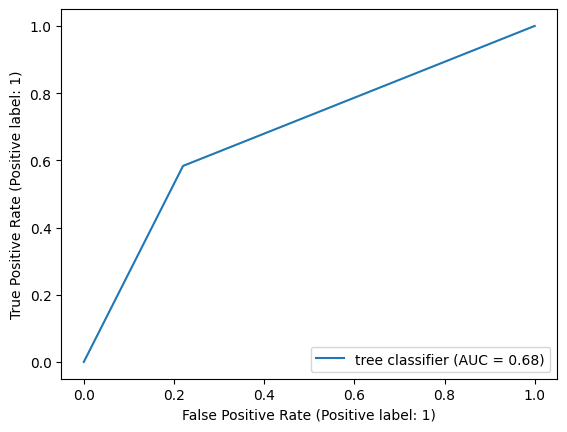

In [685]:
# Curva ROC para o modelo de Árvore de Decisão
RocCurveDisplay.from_predictions(y_val, y_previstoTree, name = 'tree classifier');

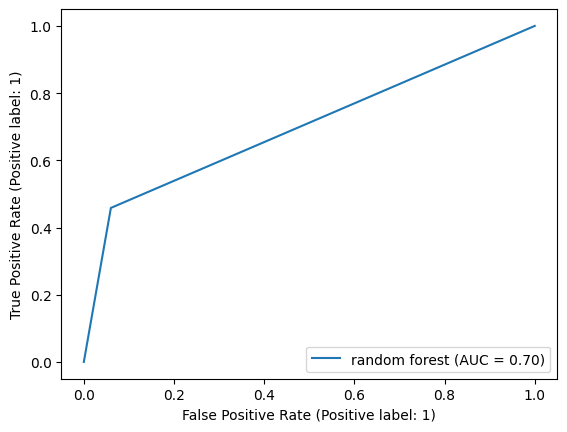

In [686]:
# Curva ROC para o modelo de RandomForest
RocCurveDisplay.from_predictions(y_val, y_previstoForest, name = 'random forest');

In [687]:
# valores da AUC
print(f'AUC (TreeClassifier): {roc_auc_score(y_val, y_previstoTree)}')
print(f'AUC (RandomForest):   {roc_auc_score(y_val, y_previstoForest)}')

AUC (TreeClassifier): 0.6816666666666668
AUC (RandomForest):   0.6991666666666666


## **Curva de Precisão x Recall**

Quanto mais próximo da **coordenada (1.0, 1.0)**, significa que melhor é o nosso modelo. E quanto mais próximo da **coordenada (0.0, 0.0)**, significa que pior é o nosso modelo.

---

* **Obs.:** a **AP** significa *average precision*, ou *precisão média*, e deve apresentar valor próximo a **1.0**, quanto melhor ser o nosso modelo.

In [688]:
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import average_precision_score

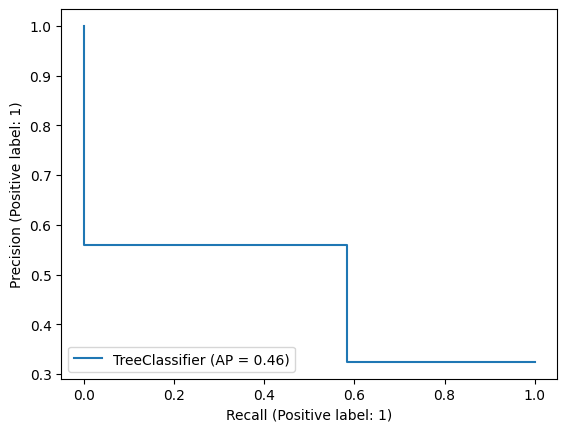

In [689]:
PrecisionRecallDisplay.from_predictions(y_val, y_previstoTree, name = 'TreeClassifier');

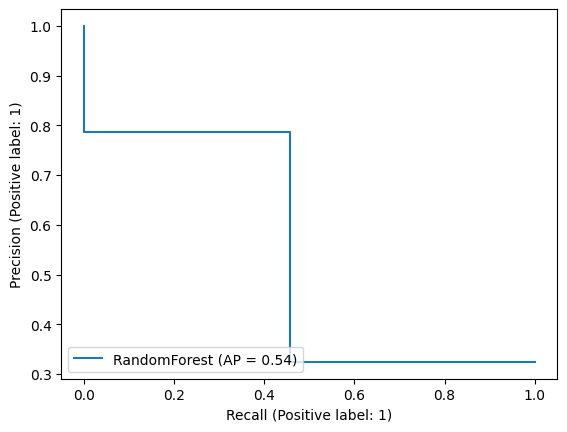

In [690]:
PrecisionRecallDisplay.from_predictions(y_val, y_previstoForest, name = 'RandomForest');

In [691]:
# valores da AP
print(f'AP (TreeClassifier): {average_precision_score(y_val, y_previstoTree)}')
print(f'AP (RandomForest):   {average_precision_score(y_val, y_previstoForest)}')

AP (TreeClassifier): 0.46180180180180186
AP (RandomForest):   0.5357947232947233


## **Relatório de Métricas**

---

Permite avaliar as métricas em apenas um comando, e também ajuda a organizá-las em apenas uma célula (auxilia na visualização).

O relatório é feito com base na *comparação* dos valores reais (de validação) com os valores previstos.

In [692]:
from sklearn.metrics import classification_report

In [693]:
# relatório de métricas p/ o modelo de Árvore de Decisão
print(f'Relatório de métricas para TreeClassifier:\n\n{classification_report(y_val, y_previstoTree)}')

# 0 = saudável
# 1 = diabético

Relatório de métricas para TreeClassifier:

              precision    recall  f1-score   support

           0       0.80      0.78      0.79        50
           1       0.56      0.58      0.57        24

    accuracy                           0.72        74
   macro avg       0.68      0.68      0.68        74
weighted avg       0.72      0.72      0.72        74



In [694]:
# relatório de métricas p/ o modelo de RandomForest
print(f'Relatório de métricas para RandomForest:\n\n{classification_report(y_val, y_previstoForest)}')

# 0 = saudável
# 1 = diabético

Relatório de métricas para RandomForest:

              precision    recall  f1-score   support

           0       0.78      0.94      0.85        50
           1       0.79      0.46      0.58        24

    accuracy                           0.78        74
   macro avg       0.78      0.70      0.72        74
weighted avg       0.78      0.78      0.77        74



## **Validação Cruzada: usando o "Método K-Fold"**

---

A métrica de **Recall** é a mais importante para esta classificação de dados, porém está muito baixa. E se isso ocorre devido ao fato do *padrão* de "dados de validação" e "dados de treino" forem padrões diferentes?

---

Para resolver isso, podemos utilizar o "Método K-Fold", que pode ser representado na imagem abaixo. Com esse método, nós dividimos os dados em  várias partes (nesse caso, em 5 partes) de mesmo tamanho. Assim, será gerado um modelo para cada parte, e a avaliação de desempenho será feita tirando a média da *métrica Recall* de cada modelo. Dessa forma, conseguimos garantir uma variação maior nos dados, impedindo que surja uma dependência da separação de dados.

---
Representação do **Método K-Fold**:

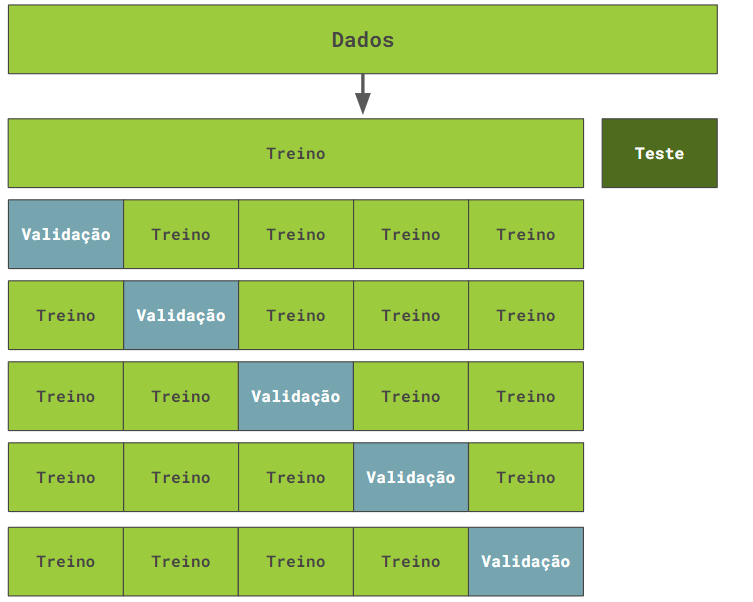

### Escolhendo um modelo

---
O modelo de **Árvore de Decisão** apresentou melhores resultados até aqui, então
 esse será o modelo escolhido para dar continuidade na classificação dos dados.

In [695]:
from sklearn.model_selection import cross_validate, KFold

In [696]:
# recriando o modelo de Árvore de Decisão
modeloTree = DecisionTreeClassifier(max_depth = 3)
# faz a divisão dos dados em 5 partes
kf = KFold(n_splits = 5, shuffle = True, random_state = 5)
# o parâmetro "shuffle" é responsável por embaralhar o conjunto de dados

# armazena os resultados das 5 divisões
cv_resultados = cross_validate(modeloTree, x, y, cv = kf)

In [697]:
cv_resultados # visualização

# fit_time: tempo necessário p/ ter feito os ajustes de cada divisão
# score_time: tempo necessário p/ calcular cada métrica de cada divisão
# test_score: desempenho de cada um dos modelos gerados

{'fit_time': array([0.00823712, 0.00501108, 0.00485563, 0.00417042, 0.00329113]),
 'score_time': array([0.00506568, 0.00429654, 0.00348496, 0.00286818, 0.00230598]),
 'test_score': array([0.72881356, 0.6779661 , 0.74576271, 0.61016949, 0.81355932])}

In [698]:
# isolando os desempenhos
cv_resultados['test_score']

array([0.72881356, 0.6779661 , 0.74576271, 0.61016949, 0.81355932])

In [699]:
# criando função

def calcula_intervalo(resultados):
  media = resultados['test_score'].mean()
  desvio_padrao = resultados['test_score'].std()

  # o intervalo está entre (media - 2*desvio_padrao) e (media + 2*desvio_padrao)
  # Caso esse último valor seja maior que 1, então o 1 será considerado.
  print(f'Intervalo de confiança: [{media - 2 * desvio_padrao}, {min(media + 2 * desvio_padrao, 1)}]')

In [700]:
calcula_intervalo(cv_resultados)

Intervalo de confiança: [0.5789847373407336, 0.8515237372355374]


### Analisando os últimos resultados

O intervalo de confiança representa apenas a métrica *Acurácia*. Mas e a métrica *Recall*? Esta métrica é mais importante, no nosso caso. Será feita essa análise abaixo.

## **Validação Cruzada com Recall**

In [701]:
# recriando o modelo de Árvore de Decisão
modeloTree = DecisionTreeClassifier(max_depth = 3)
# faz a divisão dos dados em 5 partes
kf = KFold(n_splits = 5, shuffle = True, random_state = 5)
# o parâmetro "shuffle" é responsável por embaralhar o conjunto de dados

# armazena os resultados das 5 divisões, mas apenas da métrica Recall
cv_resultados = cross_validate(modeloTree, x, y, cv = kf, scoring = 'recall')

In [702]:
cv_resultados # visualização

# fit_time: tempo necessário p/ ter feito os ajustes de cada divisão
# score_time: tempo necessário p/ calcular cada métrica de cada divisão
# test_score: desempenho de cada um dos modelos gerados

{'fit_time': array([0.00827456, 0.00434661, 0.00306511, 0.00398731, 0.0030086 ]),
 'score_time': array([0.00636554, 0.00339079, 0.00439668, 0.00383425, 0.0066185 ]),
 'test_score': array([0.66666667, 0.625     , 0.6875    , 0.5       , 0.61111111])}

In [703]:
calcula_intervalo(cv_resultados)

Intervalo de confiança: [0.4877662288937936, 0.7483448822173175]


## **Estratificando os dados**

In [704]:
# visualiza a porcentagem de presença de cada valor
dados['diabetes'].value_counts(normalize = True)

diabetes
0    0.670051
1    0.329949
Name: proportion, dtype: float64

In [705]:
from sklearn.model_selection import StratifiedKFold

In [706]:
# recriando o modelo da Árvore de Decisão
modeloTree = DecisionTreeClassifier(max_depth = 3)
# utiliza o K-Fold, mas de forma estratificada
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 5)
# o parâmetro "shuffle" é responsável por embaralhar o conjunto de dados

# armazena os resultados das 5 divisões, mas apenas da métrica Recall
cv_resultados = cross_validate(modeloTree, x, y, cv = skf, scoring = 'recall')

In [707]:
calcula_intervalo(cv_resultados)

Intervalo de confiança: [0.4898959218511152, 0.8732619728857269]


## **Balanceamento de Dados utilizando o Oversampling**

---
A estratégia de oversampling consiste em aumentar a quantidade de dados da classe que possui menor frequência até que tenha a mesma quantidade da classe de maior frequência. Porém, gera-se um problema caso seja gerado um overfitting (super-ajustamento) nos dados.

In [708]:
from imblearn.over_sampling import SMOTE

In [709]:
# o SMOTE() permite geração de dados sintéticos que se aproximam do padrão já existente nos dados
oversample = SMOTE()
x_balanceado, y_balanceado = oversample.fit_resample(x, y)

In [710]:
y_balanceado.value_counts(normalize = True)

diabetes
0    0.5
1    0.5
Name: proportion, dtype: float64

In [711]:
modeloTree = DecisionTreeClassifier(max_depth = 3)

In [712]:
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(modeloTree, x_balanceado, y_balanceado, cv = skf, scoring = 'recall')

In [713]:
calcula_intervalo(cv_resultados)

Intervalo de confiança: [0.6483247866311087, 0.8868034184970964]


### Conclusões do uso de Oversampling

---
O modelo agora compreende os **dados balanceados**, que resultaram em um intervalo de confiança muito bom para a métrica *Recall*. Porém, o modelo só poderá ser considerado como eficiente caso o valor de *Recall* ser tão bom também nos dados **desbalanceados**. Isso será feito abaixo, com o *Pipeline para Validação*.

## **Pipeline para Validação**

In [714]:
from imblearn.pipeline import Pipeline as imbpipeline # foi renomeado pois existe o pipeline também na biblioteca do scikitlearn

In [715]:
# recriando o modelo
modeloTree = DecisionTreeClassifier(max_depth = 3)
# criando o pipeline a partir do modelo
pipeline = imbpipeline([('oversample', SMOTE()), ('arvore', modeloTree)])

In [716]:
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 5)
# utiliza o pipeline (em vez do modelo) e o x e y (em vez do x_balanceado e y_balanceado), que são dados reais desbalanceados
cv_resultados = cross_validate(pipeline, x, y, cv = skf, scoring = 'recall')

In [717]:
calcula_intervalo(cv_resultados)

Intervalo de confiança: [0.5529527360444396, 0.8502051586924023]


## **Balanceamento de Dados utilizando o Undersampling (já com o Pipeline para Validação)**

---
A estratégia de **undersampling** é contrária ao oversampling, e consiste em reduzir a quantidade de dados da classe que possui maior frequência até que tenha a mesma quantidade da classe de menor frequência.

---
A principal desvantagem da estratégia de **undersampling** é a de remover dados que podem ser muito importantes para o entendimento do problema, principalmente quando essa remoção é feita sem nenhum critério, como é o caso do undersampling aleatório. Por isso, aplicarei o **NearMiss**, que preserva informações importantes para a modelagem.

In [718]:
from imblearn.under_sampling import NearMiss

In [719]:
# recriando o modelo
modeloTree = DecisionTreeClassifier(max_depth = 3)
# criando o pipeline a partir do modelo
pipeline = imbpipeline([('undersample', NearMiss(version = 3)), ('arvore', modeloTree)])

In [720]:
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 5)
# utiliza o pipeline (em vez do modelo) e o x e y (em vez do x_balanceado e y_balanceado), que são dados reais desbalanceados
cv_resultados = cross_validate(pipeline, x, y, cv = skf, scoring = 'recall')

In [721]:
calcula_intervalo(cv_resultados)

Intervalo de confiança: [0.36696629183469137, 0.8330337081653085]


### Conclusões do uso de Undersampling

---
O **undersampling** representou um modelo melhor para os dados, pois a métrica *Recall* alcançou os melhores valores dentre todos os modelos já testados anteriormente. Agora, devemos utilizar esse modelo final para verificar sua aplicação no conjunto de dados maior, da nossa database.

## **Testando o Modelo Final**

---
Vamos balancear todo o nosso conjunto de dados. Precisamos ver como se comporta o nosso modelo com os "dados de teste" (separados desde o início do projeto).

In [722]:
# utilizando o undersampling, pois foi o melhor modelo dentre os testes
undersample = NearMiss(version = 3)
x_balanceado, y_balanceado = undersample.fit_resample(x, y)

In [723]:
# recriando o modelo final
modeloTree = DecisionTreeClassifier(max_depth = 3)
# ajustando o modelo com os dados balanceados
modeloTree.fit(x_balanceado, y_balanceado)
# previsão feita com os dados separados para teste
y_previsto = modeloTree.predict(x_teste)

In [724]:
# visualizando as métricas
print(classification_report(y_teste, y_previsto))

              precision    recall  f1-score   support

           0       0.87      0.62      0.73        66
           1       0.52      0.82      0.64        33

    accuracy                           0.69        99
   macro avg       0.70      0.72      0.68        99
weighted avg       0.75      0.69      0.70        99



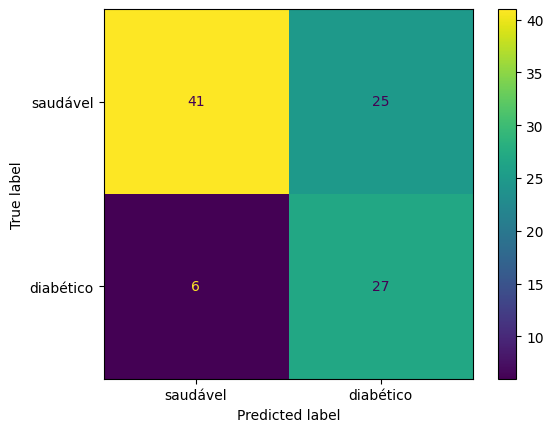

In [725]:
matriz_confusao = confusion_matrix(y_teste, y_previsto)
visualizacao = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao, display_labels = ['saudável', 'diabético'])
visualizacao.plot();

## **Conclusões**

---
O **modelo final** possui uma métrica *Recall* muito boa, se for comparada ao seu valor com outros modelos neste projeto.

---
Dessa forma, é possível verificar na matriz de confusão acima a proporção dos *Falsos Negativos* (FN) em relação ao *Verdadeiros Positivos* (VP), o que demonstra que o **modelo final** acerta a previsão mais vezes do que erra.